In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [18]:

def numerical_gradient(f, x, h=1e-5):
    """
    Compute df/dx numerically using central difference
    """
    # YOUR CODE HERE
    return (f(x + h) - f(x) ) / h 

# Test Case 1: f(x) = x²


In [19]:

def test1(x):
    return x**2
def test2(x):
    return x**3 + 2*x
def test3(x):
    return np.sin(x)

In [20]:


x = 3.0
num_grad = numerical_gradient(test1, x)
analytical = 2 * x
print("Test 1: f(x) = x²")
print(f"  Numerical: {num_grad}")
print(f"  Analytical: {analytical}")
print(f"  Match: {np.isclose(num_grad, analytical)}\n")

# Test Case 2: f(x) = x³ + 2x


x = 2.0
num_grad = numerical_gradient(test2, x)
analytical = 3*x**2 + 2
print("Test 2: f(x) = x³ + 2x")
print(f"  Numerical: {num_grad}")
print(f"  Analytical: {analytical}")
print(f"  Match: {np.isclose(num_grad, analytical)}\n")

# Test Case 3: f(x) = sin(x)


x = np.pi/4
num_grad = numerical_gradient(test3, x)
analytical = np.cos(x)
print("Test 3: f(x) = sin(x)")
print(f"  Numerical: {num_grad}")
print(f"  Analytical: {analytical}")
print(f"  Match: {np.isclose(num_grad, analytical)}\n")


Test 1: f(x) = x²
  Numerical: 6.000009999951316
  Analytical: 6.0
  Match: True

Test 2: f(x) = x³ + 2x
  Numerical: 14.000060000185497
  Analytical: 14.0
  Match: True

Test 3: f(x) = sin(x)
  Numerical: 0.7071032456340552
  Analytical: 0.7071067811865476
  Match: True



In [30]:
def sigmoid(z):
    """Sigmoid activation function"""
    # YOUR CODE HERE
    
    return 1 / (1+ np.e**(-z))

def compute_loss_and_gradient(w, x, y):
    """
    Compute loss and analytical gradient
    
    Args:
        w: weight (scalar)
        x: input (scalar)
        y: target (scalar)
    
    Returns:
        loss: scalar
        grad: ∂L/∂w (scalar)
    """
    # Forward pass
    z = w * x
    a = sigmoid(z)
    loss = (a - y)**2
    
    # Backward pass (compute ∂L/∂w)
    # YOUR CODE HERE - use your paper derivation
    dL_da =2*(a-y)
    da_dz =a*(1-a) 
    dz_dw = x
    grad = dL_da*da_dz*dz_dw
    
    return loss, grad

# Test it
x = 2.0
y = 0.8
w = 1.0

loss, analytical_grad = compute_loss_and_gradient(w, x, y)

# Compare with numerical gradient
def loss_fn(w):
    """Wrapper for numerical gradient"""
    z = w * x
    a = sigmoid(z)
    return (a - y)**2

numerical_grad = numerical_gradient(loss_fn, w)

print("Gradient Verification:")
print(f"  Analytical: {analytical_grad}")
print(f"  Numerical: {numerical_grad}")
print(f"  Difference: {abs(analytical_grad - numerical_grad)}")
print(f"  Match: {np.isclose(analytical_grad, numerical_grad)}")

Gradient Verification:
  Analytical: 0.033932699628098265
  Numerical: 0.033932882141044646
  Difference: 1.8251294638116367e-07
  Match: True


Text(0, 0.5, 'Loss function')

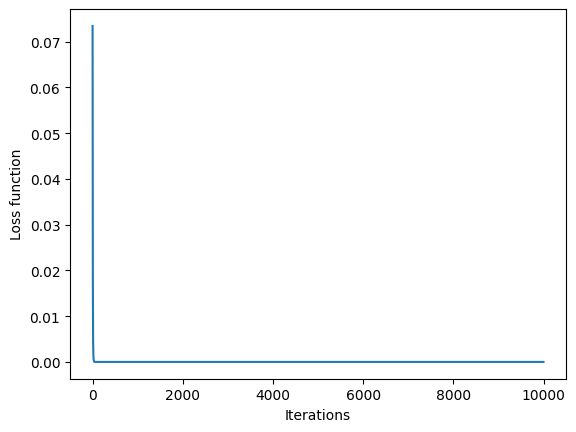

In [41]:
w = np.random.randn(1)
n_iters = 10000
x = 3
y = 0.7
lr = 0.1
loss = 0
indexes = np.arange(0, 10000)
losses = []
for i in range(n_iters): 
    loss , gradient = compute_loss_and_gradient(w, x, y)
    losses.append(loss)
    w = w - lr*gradient
losses = np.array(losses)
plt.plot(indexes, losses)
plt.xlabel("Iterations")
plt.ylabel("Loss function")

In [12]:
compute_loss_and_gradient(3.0, 3, 5)

(16.00098717183411, -0.0029611957404109598)

In [37]:
print(sigmoid(0))

0.5
